In [1]:
import pandas as pd
data = pd.read_excel('PM10.xlsx')
day = []
for i in range(1,1097):
    day.append(i)
data['DAY'] = day
data.head()

,PM10,PM2.5,Tempreature,Humid,Wind Speed,Wind Direction,Pressure,RainFall,DAY
0,88,37.0,18.9,16.375,3.125,290,857.675,0.0,1
1,52,21.0,17.0,17.500,2.250,280,857.388,0.0,2
2,51,23.0,17.2,14.500,1.125,240,858.737,0.0,3
3,158,56.0,19.6,15.875,1.000,190,860.950,0.0,4
4,112,43.0,21.3,12.875,2.125,290,860.688,0.0,5


In [8]:
X = data[['PM10','Tempreature','Humid','Wind Speed','Wind Direction','Pressure','RainFall','DAY']]
X = X.values
Y = data['PM2.5']
Y = Y.values
from sklearn.preprocessing import StandardScaler
sc_X3 = StandardScaler()
sc_y3 = StandardScaler()
X3_3 = sc_X3.fit_transform(X)
Y3_3 = Y.reshape(-1,1)
Y3_3 = sc_y3.fit_transform(Y3_3)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X3_3,Y3_3 ,test_size=0.2,random_state=0)

Generation = 1
Fitness    = 1.3903525316477898
Generation = 2
Fitness    = 1.3903525316477898
Generation = 3
Fitness    = 1.3903525316477898
Generation = 4
Fitness    = 1.3903525316477898
Generation = 5
Fitness    = 1.3903525316477898
Generation = 6
Fitness    = 1.3903525316477898
Generation = 7
Fitness    = 1.3903525316477898
Generation = 8
Fitness    = 1.3903525316477898
Generation = 9
Fitness    = 1.3903525316477898
Generation = 10
Fitness    = 1.3903525316477898
Generation = 11
Fitness    = 1.3903525316477898
Generation = 12
Fitness    = 1.3903525316477898
Generation = 13
Fitness    = 1.3903525316477898
Generation = 14
Fitness    = 1.3903525316477898
Generation = 15
Fitness    = 1.3903525316477898
Generation = 16
Fitness    = 1.3903525316477898
Generation = 17
Fitness    = 1.4522873648509436
Generation = 18
Fitness    = 1.4522873648509436
Generation = 19
Fitness    = 1.4522873648509436
Generation = 20
Fitness    = 1.4522873648509436
Generation = 21
Fitness    = 1.4522873648509436
G

Generation = 171
Fitness    = 1.6889403579922462
Generation = 172
Fitness    = 1.6889403579922462
Generation = 173
Fitness    = 1.6889403579922462
Generation = 174
Fitness    = 1.6889403579922462
Generation = 175
Fitness    = 1.6889403579922462
Generation = 176
Fitness    = 1.6889403579922462
Generation = 177
Fitness    = 1.6889403579922462
Generation = 178
Fitness    = 1.6889403579922462
Generation = 179
Fitness    = 1.6889403579922462
Generation = 180
Fitness    = 1.6889403579922462
Generation = 181
Fitness    = 1.6889403579922462
Generation = 182
Fitness    = 1.6889403579922462
Generation = 183
Fitness    = 1.6889403579922462
Generation = 184
Fitness    = 1.6889403579922462
Generation = 185
Fitness    = 1.6889403579922462
Generation = 186
Fitness    = 1.6889403579922462
Generation = 187
Fitness    = 1.6889403579922462
Generation = 188
Fitness    = 1.6889403579922462
Generation = 189
Fitness    = 1.6889403579922462
Generation = 190
Fitness    = 1.6889403579922462
Generation = 191
Fit

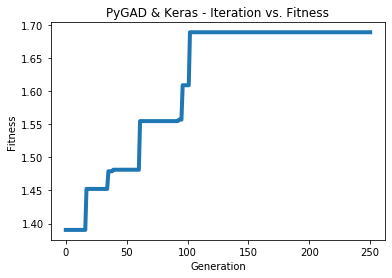

Fitness value of the best solution = 1.6889403579922462
Index of the best solution : 0
Absolute Error :  0.5920872
Mse Error :  0.6964986
RMse Error :  0.8345649003081699


In [10]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad
import math

def fitness_func(solution, sol_idx):
    global data_inputs1, data_outputs1, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs1)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    mse = tensorflow.keras.losses.MeanSquaredError()
    mse_error = mse(data_outputs1,predictions).numpy()
    rmse = math.sqrt(mse_error)
    abs_error = mae(data_outputs1, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(8)
dense_layer1 = tensorflow.keras.layers.Dense(8, activation="relu")(input_layer)
dense_layer2 = tensorflow.keras.layers.Dense(8, activation="relu")(dense_layer1)
dense_layer3 = tensorflow.keras.layers.Dense(8, activation="relu")(dense_layer2)
dense_layer4 = tensorflow.keras.layers.Dense(8, activation="relu")(dense_layer3)
dense_layer5 = tensorflow.keras.layers.Dense(8, activation="relu")(dense_layer4)
dense_layer6 = tensorflow.keras.layers.Dense(8, activation="relu")(dense_layer5)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer6)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=8)

# Data inputs
data_inputs = x_train1

# Data outputs
data_outputs = y_train1

num_generations = 250
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
data_inputs1 = x_test1
data_outputs1 = y_test1
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs1)

mae = tensorflow.keras.losses.MeanAbsoluteError()
mse = tensorflow.keras.losses.MeanSquaredError()
abs_error = mae(data_outputs1, predictions).numpy()
mse_error = mse(data_outputs1,predictions).numpy()
print("Absolute Error : ", abs_error)
print("Mse Error : ", mse_error)
print("RMse Error : ", math.sqrt(mse_error))
